![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and Pedro Angelo Medeiros Fonini
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#somente para o plot ficar com o mesmo tema do meu jupyter, favor ignorar
#from jupyterthemes import jtplot as jt
#jt.style(theme="gruvboxd")

# Pivôs e eliminação

## Questão 1: Eliminação pura

Comece escrevendo um código de resolução de sistemas lineares que não permuta linhas nem colunas

In [3]:
def solve(A,b):
    """Resolve o sistema  Ax = b,  sem reordenar linhas ou colunas"""
    A = np.array(A)
    b = np.array(b)
    lin = len(b)
    for i in range(lin):
        for k in range(i+1,lin):
            coef = (A[k,i]/A[i,i])
            A[k:k+1] = A[k:k+1] - A[i:i+1]*coef
            A[k,i] = 0
            b[k] = b[k] - b[i]*coef
    x = [b[lin-1]/A[lin-1,lin-1]]
    for j in range (lin-1):
        x_is = (b[lin-j-2] - np.sum(A[lin-j-2,lin-j-1:lin]*np.flip(x,0))) / A[lin-j-2,lin-j-2]
        x.append(x_is)
    return np.flip(x,0)

Vejamos que está funcionando, dando resultados semelhantes ao que vimos em aula:

In [4]:
np.random.seed(1)

M = np.vander(np.arange(11, dtype=np.float64), increasing=True)
b = np.random.rand(11)
x1 = solve(M,b)

b1 = M @ x1
assert b1[0] == b[0]
assert np.isclose(b1[10], b[10])
assert np.linalg.norm(b1 - b) < 1e-8

In [5]:
np.random.seed(2)

M = np.vander(np.arange(51, dtype=np.float64), increasing=True)
b = np.random.rand(51)
x1 = solve(M,b)

b1 = M @ x1
assert b1[0] == b[0]
assert np.isclose(b1[4], b[4])
assert np.abs(b1[-3] - b[-3]) > 1e10

Agora, resolva 100 sistemas $51 \times 51$, com a mesma matriz, mas com diferentes valores de $b$.
Mostre, num mesmo gráfico,
* o erro absoluto médio
* o menor erro absoluto
* o maior erro absoluto

para cada equação do sistema $Ax = b$.

In [6]:
def Erros (aux,**kwargs):
    '''Retorna os Erros Máximos, Médios e Mínimos Absolutos da solução de um sistema linear Mx=b dada uma função de solução (aux)
       se for dado mais uma função é feita a comparação entre as duas, ou seja, o mesmo vetor b é usado para o calculo das duas
       e retornado uma lista com os Erros Máximos, Médios e Mínimos Absolutos das duas soluções'''
    
    M = np.vander(np.arange(51, dtype=np.float64), increasing=True)
    acc_err = np.zeros(51)
    max_err = np.zeros(51)
    min_err = np.ones(51) * np.inf
    M_err = np.zeros((51,100))
    # Contas aqui
    aux2 = kwargs.get("aux2")
    if aux2 is None:
        for k in range(100):
            b = np.random.rand(51)
            x = aux(M,b)
            b_s = M@x
            for i in range (51):
                M_err[i,k] = (np.abs(b_s[i] - b[i]))
        for j in range(51):
            acc_err[j] = M_err[j:j+1].mean()
            max_err[j] = M_err[j:j+1].max()
            min_err[j] = M_err[j:j+1].min()
        return max_err, acc_err, min_err
    else:
        acc_err2 = np.zeros(51)
        max_err2 = np.zeros(51)
        min_err2 = np.ones(51) * np.inf
        M_err2 = np.zeros((51,100))
        for k in range(100):
            b = np.random.rand(51)
            x = aux(M,b)
            x2 = aux2(M,b)
            b_s = M@x
            b_s2 = M@x2
            for i in range (51):
                M_err[i,k] = (np.abs(b_s[i] - b[i]))
                M_err2[i,k] = (np.abs(b_s2[i] - b[i]))
        for j in range(51):
            acc_err[j] = M_err[j:j+1].mean()
            max_err[j] = M_err[j:j+1].max()
            min_err[j] = M_err[j:j+1].min()

            acc_err2[j] = M_err2[j:j+1].mean()
            max_err2[j] = M_err2[j:j+1].max()
            min_err2[j] = M_err2[j:j+1].min()
        return [max_err, acc_err, min_err] , [max_err2, acc_err2, min_err2]

In [7]:
%%time 
max_err,acc_err,min_err = Erros(solve)

Wall time: 1.38 s


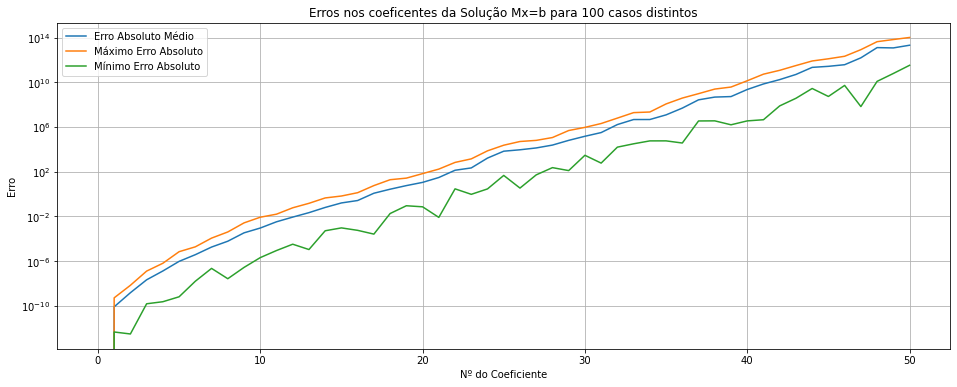

In [8]:
# Gráfico aqui
#Plot
plt.figure(figsize = (16,6))
plt.semilogy(acc_err,label = "Erro Absoluto Médio")
plt.semilogy(max_err,label = "Máximo Erro Absoluto")
plt.semilogy(min_err,label = "Mínimo Erro Absoluto")
#Eixos
plt.xlabel("Nº do Coeficiente")
plt.ylabel("Erro")
plt.title("Erros nos coeficentes da Solução Mx=b para 100 casos distintos")
plt.grid()
plt.legend();

ax = plt.gca();

In [9]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.get_legend().get_texts()) == 3

In [10]:
ax = None

O que você observa?

Podemos observar que há uma tendência muito forte de crescimento do erro conforme vamos para os coeficiente do final do vetor solução do sistema. Podemos ainda ver que os erros médios estão sempre mais próximos dos máximos, o que indica que existem mais erros maiores do que eventos onde o erro é menor.

## Questão 2: Permutando linhas

Re-escreva o código de eliminação para encontrar, a cada coluna, a linha que tem o maior pivô (em valor absoluto).

Observações:
* Não será necessário alterar a parte de substituição;
* Mas lembre-se de também alterar as linhas de `b`.
* E cuidado ao mudar as linhas de uma matriz: use `np.copy` para copiar linhas, e `[:]` para substituir todos os valores de um array.

In [11]:
def solve_pivot_lines(A,b,fracoes = False):
    """xve o sistema  Ax = b,  reordenando apenas linhas, se necessário."""
    lin = len(b)
    A = np.array(A,dtype=np.float64)
    b = np.array(b,dtype=np.float64)
    A = np.insert(A,lin,b,axis=1)
    for i in range(lin):
        max_col = np.max(np.abs(A[i:lin,i]))
        if max_col != np.abs(A[i,i]):
            col = list(np.abs(A[i:lin+1,i]))
            linha_c = np.copy(A[i:i+1, :])
            ind = col.index(max_col)+i
            A[i:i+1] = np.copy(A[ind:ind+1, : ])
            A[ind:ind+1] = linha_c
        for k in range(1+i,lin):
            coef = (A[k,i]/A[i,i])
            A[k:k+1] = A[k:k+1] - A[i:i+1]*coef
   
    b = A[0:lin,lin]
    A = np.delete(A,lin,1)
    x = []
    x.append(b[lin-1]/A[lin-1,lin-1])
    for j in range(lin-1):
        x_js = (b[lin-j-2] - np.sum(A[lin-j-2,lin-j-1:lin]*np.flip(x,0)))/A[lin-j-2,lin-j-2]
        x.append(x_js)
    
    return np.flip(x,0)

Novamente, testando que está tudo ok:

In [12]:
np.random.seed(3)

M = np.vander(np.arange(11, dtype=np.float64), increasing=True)
b = np.random.rand(11)
x1 = solve_pivot_lines(M,b)

b1 = M @ x1
assert b1[0] == b[0]
assert np.isclose(b1[10], b[10])
assert np.linalg.norm(b1 - b) < 1e-8

In [13]:
np.random.seed(4)

M = np.vander(np.arange(51, dtype=np.float64), increasing=True)
b = np.random.rand(51)
x1 = solve_pivot_lines(M,b)

b1 = M @ x1
assert b1[0] == b[0]
assert np.allclose(b1, b, atol=30.0)
assert np.linalg.norm(b - b1) > 10

Estes testes são (ligeiramente) diferentes dos testes para `solve`, que não realizava permutação de linhas.
Explique porque estas mudanças
1. são necessárias; e
2. fazem sentido.

As mudanças estão nos asserts da segunda caixa, onde há a mudança de np.isclose para np.allclose, além de não se fazer mais as comparações isoladas de elementos do vetor solução(somente para o primeiro elemento). Isso se dá pois, com a permutação das linhas, não se tem mais o conhecimento do posicionamento final dos elementos e onde eles estavam. Por isso se torna necessária uma análise que envolva todos os elementos do vetor e que faça esssa comparação sem precisar comparar elemento a elemento. Por isso a escolha de usar o np.allclose, que diferentemente do np.isclose, ele retorna um unico valor booleano para todas as comparações, em vez de uma matriz de valores booleanos das comparações elemento a elemento. 

In [14]:
np.random.seed(4)

M = np.vander(np.arange(51, dtype=np.float64), increasing=True)
b = np.random.rand(51)
x1 = solve_pivot_lines(M,b)

b1 = M @ x1
assert b1[0] == b[0]
assert np.allclose(b1, b, atol=30.0)

### Mais gráficos

Repita a análise, com 100 sistemas $51 \times 51$.

In [15]:
%%time

max_err2,acc_err2,min_err2 = Erros(solve_pivot_lines)

Wall time: 1.34 s


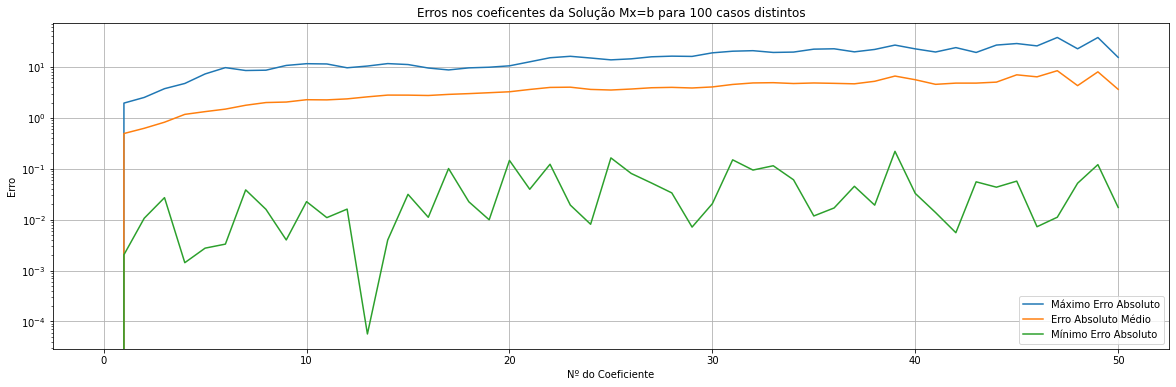

In [16]:
# Gráfico aqui
plt.figure(figsize = (20,6))
plt.semilogy(max_err2,label = "Máximo Erro Absoluto")
plt.semilogy(acc_err2,label = "Erro Absoluto Médio")
plt.semilogy(min_err2,label = "Mínimo Erro Absoluto")
plt.xlabel("Nº do Coeficiente")
plt.ylabel("Erro")
plt.title("Erros nos coeficentes da Solução Mx=b para 100 casos distintos")
plt.grid()
plt.legend();

ax = plt.gca()

In [17]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.get_legend().get_texts()) == 3

In [18]:
ax = None

## Questão 3: Quantidade de trocas de linhas

Agora, adapte seu código de eliminação para contar (e apenas contar) o número de permutações de linhas efetuadas.
Observe que esta quantidade é independente do valor de $b$.

In [19]:
def count_row_xchg(A):
    """Conta o número de permutações de linhas efetuadas para resolver o sistema  Ax = b"""
    lin = len(A)
    A = np.array(A,dtype=np.float64)
    per = 0
    for i in range(lin):
        max_col = np.max(np.abs(A[i:lin,i]))
        if max_col != np.abs(A[i,i]):
            col = list(np.abs(A[i:lin+1,i]))
            lin_1 = np.copy(A[i:i+1,:])
            ind = col.index(max_col)+i
            A[i:i+1] = np.copy(A[ind:ind+1,:])
            A[ind:ind+1] = lin_1
            per +=1  
        for k in range(i+1,lin):
            coef = (A[k,i]/A[i,i])
            A[k:k+1] = A[k:k+1] - A[i:i+1]*coef
    return per

In [20]:
M = np.vander(np.arange(11, dtype=np.float64), increasing=True)
assert count_row_xchg(M) == 7

M = np.vander(np.arange(51, dtype=np.float64), increasing=True)
assert count_row_xchg(M) == 44

Quantas permutações de linha são realizadas
- para as matrizes de Vandermonde assimétricas
- para as matrizes de Vandermonde simétricas
- para matrizes gaussianas

em função de $n$?

Faça um gráfico.

In [21]:
%%time
# Contas
per_gauss = []
per_sim = []
per_sim2 = []
per_assim = []

for i in range(2,100):
    M_gauss = np.random.randn(i,i)
    #M_sim = np.vander(np.logspace(0,i,base=2,num=i+1,endpoint=True), increasing=True) ---comentado pois achei que simétrica era isso
    M_sim2 = np.vander(np.random.randn(i), increasing=True)
    M_assim = np.vander(np.arange(i), increasing=True)
    per_gauss.append(count_row_xchg(M_gauss))
    #per_sim.append(count_row_xchg(M_sim)) ---comentado pois achei que simétrica era isso
    per_sim2.append(count_row_xchg(M_sim2))
    per_assim.append(count_row_xchg(M_assim))


Wall time: 4.16 s


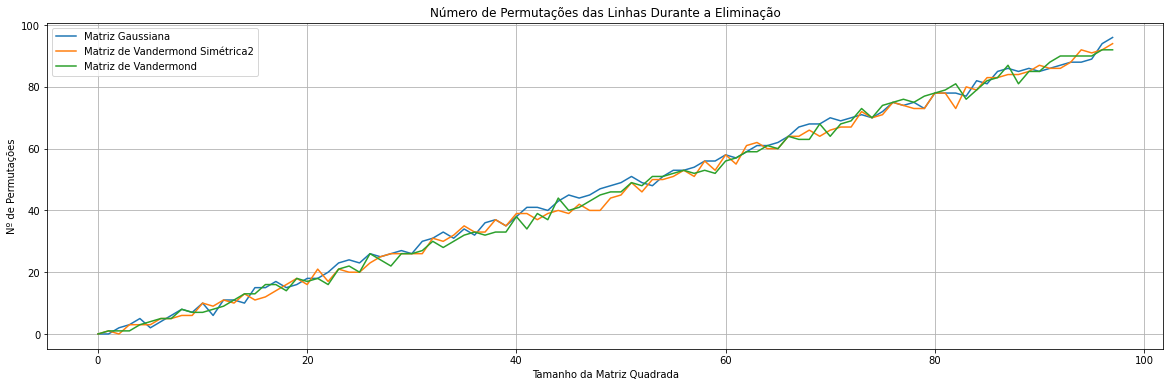

In [22]:
#plot
plt.figure(figsize=(20,6))
plt.plot(per_gauss,label="Matriz Gaussiana")
#plt.plot(per_sim,label="Matriz de Vandermond Simétrica")  ---comentado pois achei que simétrica era isso
plt.plot(per_sim2,label="Matriz de Vandermond Simétrica2")
plt.plot(per_assim,label="Matriz de Vandermond")
#Eixos
plt.title("Número de Permutações das Linhas Durante a Eliminação")
plt.xlabel("Tamanho da Matriz Quadrada")
plt.ylabel("Nº de Permutações")
plt.grid()
plt.legend();

O que você percebe?

Podemos ver que o número de permutações cresce linearmente com o tamanho da matriz, claro que levando em conta as flutuações pontuais, mas que a tendência de crescimento é linear em relação ao tamanho da matriz.

## Questão 4 (Bônus): comparando com o `numpy`

Faça o gráfico dos erros para o `np.linalg.solve`.  Como este se comporta, em comparação com o método de troca de linhas?

In [23]:
%%time
pivot, numpy = Erros(solve_pivot_lines, aux2 = np.linalg.solve)

Wall time: 1.52 s


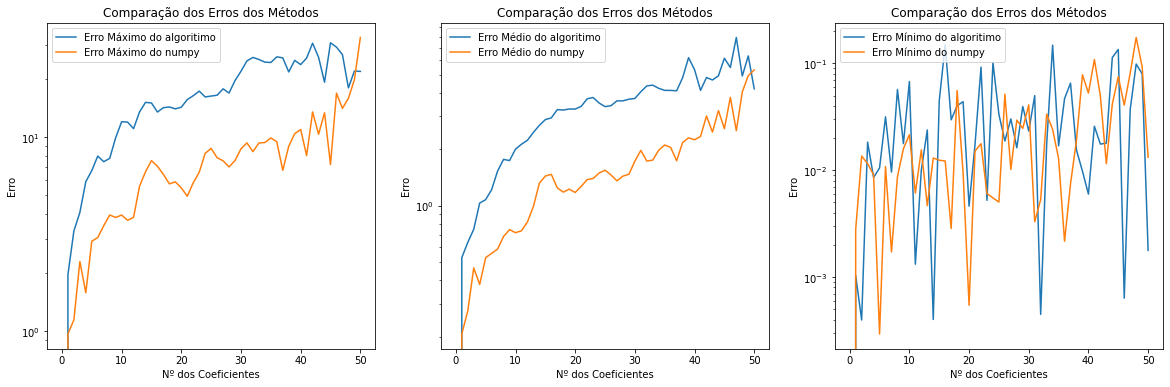

In [24]:
_,axs = plt.subplots(ncols=3, figsize=(20,6))
#Dados
name = ["Erro Máximo", "Erro Médio", "Erro Mínimo"]
#Plot
for ax, i, j, n in zip(axs,pivot,numpy,name):
        ax.semilogy(i,label=f"{n} do algoritimo")
        ax.semilogy(j,label=f"{n} do numpy")
#Eixos
        ax.set_title("Comparação dos Erros dos Métodos")
        ax.set_xlabel("Nº dos Coeficientes")
        ax.set_ylabel("Erro")
        ax.legend()

Podemos ver que a função do numpy é melhor que o algoritimo desenvolvido em python, salvo raras excessões. Tambem observamos que ao introduzir o pivoteamento parcial conseguimos limitar o crescimento dos erros dos coeficientes do vetor solução, fazendo com que as duas curvas sejam parecidas, porem é perceptivel que a função do numpy é otimizada para tratar desses problemas, e por isso consegue ter erros menores e mais proximos dos erros minimos que o algorítimo desenvolvido. 